In [1]:
library(Seurat)
library(dplyr)
library(tidyverse)
library(ggplot2)
library(RColorBrewer)
library(ggsignif)
library(ggpubr)
library(lme4)
library(lmerTest)
library(tibble)
library(grDevices)
library(qs)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.5.0     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

 

In [2]:
# analysis of integrated object
sobj_new <- qread("/home/a.garg/integration_project/step_10/ROSMAP_edited_cell_type/Allfour_SCT_integration_layer_wdedited_meta.qs", nthreads = 6)

In [4]:
# subset
n1_subset <- subset(sobj_new, subset = batch =="BJ" )
n2_subset <- subset(sobj_new, subset = batch =="KD" )
n3_subset <- subset(sobj_new, subset = batch =="MD" )
n4_subset <- subset(sobj_new, subset = batch =="ROSMAP_MIT")


In [5]:
n1_subset
n2_subset
n3_subset
n4_subset

An object of class Seurat 
64798 features across 25407 samples within 2 assays 
Active assay: SCT (26942 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, umap.unintegrated, integrated.cca, umap.cca

An object of class Seurat 
64798 features across 15726 samples within 2 assays 
Active assay: SCT (26942 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, umap.unintegrated, integrated.cca, umap.cca

An object of class Seurat 
64798 features across 15350 samples within 2 assays 
Active assay: SCT (26942 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, umap.unintegrated, integrated.cca, umap.cca

An object of class Seurat 
64798 features across 166339 samples within 2 assays 
Active assay: SCT (26942 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA
 4 dimensional reductions calculated: pca, umap.unintegrated, integrated.cca, umap.cca

In [18]:
files = system('ls -1v /home/a.garg/integration_project/step_15/before_annotation/part_1/run/nebula_output/nebula*txt',intern=T)

sigUpGenes = lapply(files,function(f){
	tmp = read.table(f,stringsAsFactors=F,head=T,sep='\t')
	rownames(tmp) <- tmp$gene
z = tmp[tmp$z.score > 0 & abs(tmp$logFC_cluster) > 0.25,]
z = rownames(z[order(z$logFC_cluster, decreasing = TRUE),])
return(z)
})
names(sigUpGenes)<- paste("Integrated_cluster", sep = "_", 0:13)

In [24]:
#average of upregulated genes 
files = system('ls -1v /home/a.garg/integration_project/step_15/before_annotation/part_1/run/nebula_output/nebula*txt',intern=T)

sigUpGenes = lapply(files,function(f){
	tmp = read.table(f,stringsAsFactors=F,head=T,sep='\t')
	rownames(tmp) <- tmp$gene
z = tmp[tmp$z.score > 0 & abs(tmp$logFC_cluster) > 0.25,]
z = rownames(z[order(z$logFC_cluster, decreasing = TRUE),])
#return(length(tmp$gene)) 
return(length(z))
})

mean(unlist(sigUpGenes))

[1] 940.6429

In [7]:
sigUpGenes

$Integrated_cluster_0
  [1] "PURPL"      "AC009432.2" "SPATA18"    "CASC9"      "TMEM132E"  
  [6] "AC022140.1" "AL392172.2" "CACHD1"     "ROBO4"      "CYYR1"     
 [11] "BCL11B"     "CXXC4"      "ARHGEF5"    "ZBED3-AS1"  "PROX2"     
 [16] "ZNF827"     "KCNE5"      "AC008691.1" "CCDC8"      "FAT1"      
 [21] "AP003481.1" "CA8"        "NFYC-AS1"   "MXRA8"      "PRRG1"     
 [26] "HIF3A"      "VANGL2"     "PIK3R3"     "LINC00893"  "FGF2"      
 [31] "MMP28"      "PAQR5"      "TRIM6"      "PTCHD4"     "BRINP2"    
 [36] "ARL5C"      "SATB1"      "PLXNA2"     "KDM4A"      "AJUBA"     
 [41] "FRMD6-AS1"  "FAM83B"     "COL4A4"     "SNX22"      "AC025181.2"
 [46] "SAXO1"      "ZNF37A"     "CFAP74"     "MEGF6"      "CLEC14A"   
 [51] "CCDC144A"   "SMIM35"     "LINC00996"  "RTL5"       "MCTP2"     
 [56] "NAV2"       "ASS1"       "GUCA1C"     "POC1B-AS1"  "LOX"       
 [61] "TTC30B"     "LINC01980"  "AC104041.1" "NOTCH3"     "AC098864.1"
 [66] "AC008014.1" "ANGPTL2"    "P2RY12"     "DSP"        "KIAA1217"  
 [71] "ENPP3"      "LOXL1"      "BCL11A"     "SALL3"      "C12orf42"  
 [76] "CDH1"       "LINC02057"  "APCDD1"     "AC008892.1" "ZNF587B"   
 [81] "ADGB"       "SAMD11"     "GABRE"      "WDR31"      "LINC01268" 
 [86] "PHLDB1"     "PRAC2"      "AF127936.1" "RBAK"       "SEMA3C"    
 [91] "MXRA5"      "AC239800.3" "MIR193BHG"  "AC110769.2" "APBB2"     
 [96] "AC090115.1" "ZNF660"     "MMP11"      "CECR2"      "ZNF763"    
[101] "DTX4"       "VIPR1"      "CYSLTR1"    "NXPH4"      "CHML"      
[106] "RTCA-AS1"   "MAP2K6"     "CLDN9"      "NKILA"      "AC092747.4"
[111] "MORC1"      "FIGN"       "NOS1AP"     "BICRA"      "METTL27"   
[116] "DOCK4-AS1"  "ZNF506"     "AC087564.1" "DPYS"       "TNIK"      
[121] "MAP1LC3B2"  "EDA2R"      "MRO"        "P3H2"       "ZNF548"    
[126] "AC008608.2"

$Integrated_cluster_1
  [1] "HCAR1"        "AC083949.1"   "CCL13"        "TMEM163"      "INSL3"       
  [6] "ERC2"         "CHI3L2"       "METTL1"       "CISH"         "CYP27C1"     
 [11] "RGS20"        "PRKCA-AS1"    "PHLDA2"       "MATR3"        "RGS7"        
 [16] "BYSL"         "KC877982.1"   "TMTC1"        "TACSTD2"      "PRR5-ARHGAP8"
 [21] "KIAA1024"     "HPN"          "SLC7A1"       "INAVA"        "HAMP"        
 [26] "BIN1"         "SLAMF7"       "MYEOV"        "KIRREL3"      "FAM129A"     
 [31] "LILRB5"       "B3GNT7"       "CLEC14A"      "DCAF4"        "SLC22A1"     
 [36] "AC005699.1"   "PRR5"         "PIM1"         "PVR"          "ENPP2"       
 [41] "SGMS2"        "NLE1"         "AC109826.1"   "PLEKHG6"      "AC133919.2"  
 [46] "RRS1"         "CD38"         "HCAR2"        "VSIG4"        "PNP"         
 [51] "FAM157C"      "TBXA2R"       "GP9"          "TMEM63C"      "CAMK4"       
 [56] "SH2D4B"       "NOP16"        "SH3RF3"       "IKZF2"        "CTPS1"       
 [61] "POLR3G"       "IGFBP4"       "AL356417.2"   "CAVIN1"       "TACR1"       
 [66] "HEPH"         "ANKRD22"      "FAM20A"       "FAM86C1"      "LMNB1"       
 [71] "SPATA6"       "ARHGEF35"     "GPATCH4"      "AC002480.2"   "LRP8"        
 [76] "SH2B2"        "DHX33"        "S100A8"       "MANF"         "MYLK2"       
 [81] "HRH2"         "HCAR3"        "IL21R"        "GFRA1"        "PLIN5"       
 [86] "MRTO4"        "CPEB4"        "NT5DC3"       "LIFR"         "ITGB8"       
 [91] "LIMK2"        "FAM241A"      "TIFAB"        "PTGIR"        "ALDH1L2"     
 [96] "PRKCA"        "F3"           "RRP12"        "NCK2"         "AC138035.1"  
[101] "ABCF2.1"      "LILRA5"       "IPCEF1"       "SEMA6B"       "AC069368.1"  
[106] "FLVCR2"       "FOSL1"        "PVT1"         "MYO1G"        "JAK3"        
[111] "MMP25"        "TNFRSF25"     "ZNF239"       "NR2C2AP"      "URB1"        
[116] "PXN"          "IPO4"         "CA8"          "DPH2"         "TMEM121B"    
[121] "CCND1"        "SLFNL1"       "TIFA"         "SLC25A15"     "PPA1"        
[126] "PCDH12"       "PPIL1"        "ASGR1"        "LAYN"         "TGFBR1"      
[131] "GNG11"        "DDX21"        "TVP23C"       "PDI

In [8]:
# save file
for (key in names(sigUpGenes)) {
  writeLines(sigUpGenes[[key]], paste0(key, ".txt"))
}

In [9]:
colnames(sobj_new@meta.data)

[1] "orig.ident"            "nCount_RNA"            "nFeature_RNA"         
 [4] "dataset"               "Sample.ID"             "batch"                
 [7] "Cell_type"             "RNA_snn_res.1"         "seurat_clusters"      
[10] "percent.rbs"           "Gender"                "PMI"                  
[13] "AOD"                   "Status"                "nAPOE"                
[16] "ADAD"                  "clusters_data"         "brainRegion"          
[19] "age_death"             "msex"                  "pmi"                  
[22] "ADdiag3types"          "nCount_SCT"            "nFeature_SCT"         
[25] "unintegrated_clusters" "barcode"               "cca_cluster"          
[28] "percent.mt"            "percent.ribo"

In [69]:
sobj_new <- AddModuleScore(sobj_new, features = sigUpGenes)

In [70]:
colnames(sobj_new@meta.data)

[1] "orig.ident"            "nCount_RNA"            "nFeature_RNA"         
 [4] "dataset"               "Sample.ID"             "batch"                
 [7] "Cell_type"             "RNA_snn_res.1"         "seurat_clusters"      
[10] "percent.rbs"           "Gender"                "PMI"                  
[13] "AOD"                   "Status"                "nAPOE"                
[16] "ADAD"                  "clusters_data"         "brainRegion"          
[19] "age_death"             "msex"                  "pmi"                  
[22] "ADdiag3types"          "nCount_SCT"            "nFeature_SCT"         
[25] "unintegrated_clusters" "barcode"               "cca_cluster"          
[28] "percent.mt"            "percent.ribo"          "Cluster1"             
[31] "Cluster2"              "Cluster3"              "Cluster4"             
[34] "Cluster5"              "Cluster6"              "Cluster7"             
[37] "Cluster8"              "Cluster9"              "Cluster10"            
[40] "Cluster11"             "Cluster12"             "Cluster13"            
[43] "Cluster14"

In [71]:
sobj_new_cols <- colnames(sobj_new@meta.data)
sobj_new_cols[grep("Cluster[0-9]+$", sobj_new_cols)] <- paste("Int. cluster", sep = "_", 0:13)
colnames(sobj_new@meta.data) <- sobj_new_cols
markers_mod <- paste("Int. cluster", sep = "_", 0:13)

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


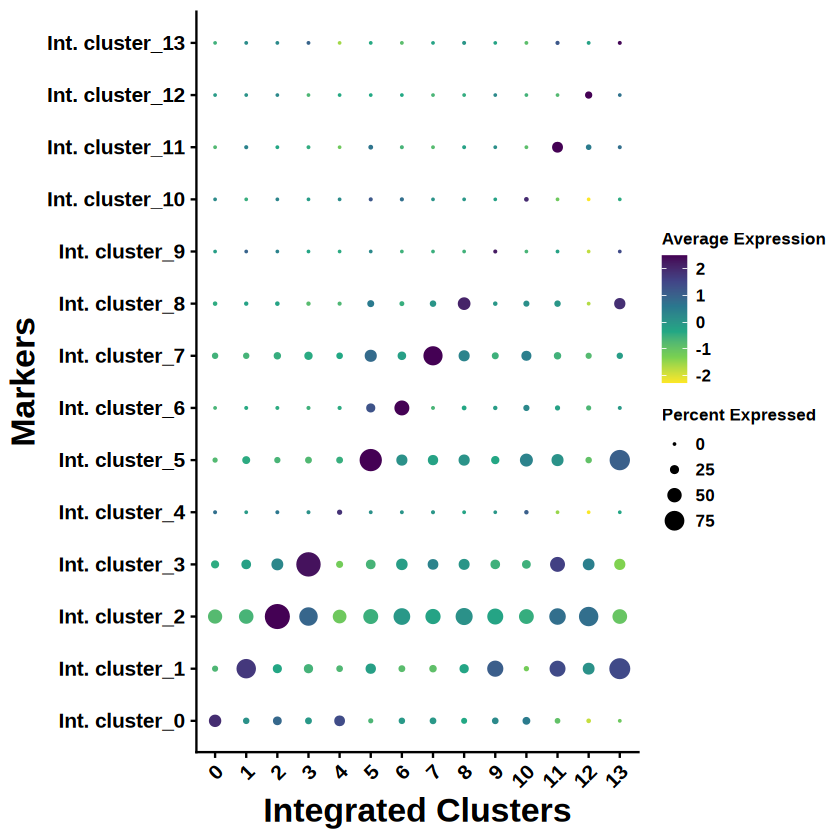

In [76]:
p <- DotPlot(sobj_new , features = , markers_mod , assay = "SCT",
        cluster.idents = F, group.by = "cca_cluster")  + RotatedAxis() + 
        scale_color_viridis_c(direction = -1) + coord_flip()
p <- p + theme(text = element_text(size = 20, face = "bold")) +
    ylab("Integrated Clusters") +
    xlab("Markers") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme(
        legend.title = element_text(size = 10),
        legend.text = element_text(size = 10)
    )
p$data$id <- factor(p$data$id, levels = 0:99)

p
ggsave(plot = p, "nebula_module_dotplot_marker_7march.pdf", height = 5, width = 7, bg = "white")

In [10]:
n1_subset <- AddModuleScore(n1_subset, features = sigUpGenes)
n2_subset <- AddModuleScore(n2_subset, features = sigUpGenes)
n3_subset <- AddModuleScore(n3_subset, features = sigUpGenes)
n4_subset <- AddModuleScore(n4_subset, features = sigUpGenes)

In [11]:
colnames(n1_subset@meta.data)
colnames(n2_subset@meta.data)
colnames(n3_subset@meta.data)
colnames(n4_subset@meta.data)

[1] "orig.ident"            "nCount_RNA"            "nFeature_RNA"         
 [4] "dataset"               "Sample.ID"             "batch"                
 [7] "Cell_type"             "RNA_snn_res.1"         "seurat_clusters"      
[10] "percent.rbs"           "Gender"                "PMI"                  
[13] "AOD"                   "Status"                "nAPOE"                
[16] "ADAD"                  "clusters_data"         "brainRegion"          
[19] "age_death"             "msex"                  "pmi"                  
[22] "ADdiag3types"          "nCount_SCT"            "nFeature_SCT"         
[25] "unintegrated_clusters" "barcode"               "cca_cluster"          
[28] "percent.mt"            "percent.ribo"          "Cluster1"             
[31] "Cluster2"              "Cluster3"              "Cluster4"             
[34] "Cluster5"              "Cluster6"              "Cluster7"             
[37] "Cluster8"              "Cluster9"              "Cluster10"            
[40] "Cluster11"             "Cluster12"             "Cluster13"            
[43] "Cluster14"

[1] "orig.ident"            "nCount_RNA"            "nFeature_RNA"         
 [4] "dataset"               "Sample.ID"             "batch"                
 [7] "Cell_type"             "RNA_snn_res.1"         "seurat_clusters"      
[10] "percent.rbs"           "Gender"                "PMI"                  
[13] "AOD"                   "Status"                "nAPOE"                
[16] "ADAD"                  "clusters_data"         "brainRegion"          
[19] "age_death"             "msex"                  "pmi"                  
[22] "ADdiag3types"          "nCount_SCT"            "nFeature_SCT"         
[25] "unintegrated_clusters" "barcode"               "cca_cluster"          
[28] "percent.mt"            "percent.ribo"          "Cluster1"             
[31] "Cluster2"              "Cluster3"              "Cluster4"             
[34] "Cluster5"              "Cluster6"              "Cluster7"             
[37] "Cluster8"              "Cluster9"              "Cluster10"            
[40] "Cluster11"             "Cluster12"             "Cluster13"            
[43] "Cluster14"

[1] "orig.ident"            "nCount_RNA"            "nFeature_RNA"         
 [4] "dataset"               "Sample.ID"             "batch"                
 [7] "Cell_type"             "RNA_snn_res.1"         "seurat_clusters"      
[10] "percent.rbs"           "Gender"                "PMI"                  
[13] "AOD"                   "Status"                "nAPOE"                
[16] "ADAD"                  "clusters_data"         "brainRegion"          
[19] "age_death"             "msex"                  "pmi"                  
[22] "ADdiag3types"          "nCount_SCT"            "nFeature_SCT"         
[25] "unintegrated_clusters" "barcode"               "cca_cluster"          
[28] "percent.mt"            "percent.ribo"          "Cluster1"             
[31] "Cluster2"              "Cluster3"              "Cluster4"             
[34] "Cluster5"              "Cluster6"              "Cluster7"             
[37] "Cluster8"              "Cluster9"              "Cluster10"            
[40] "Cluster11"             "Cluster12"             "Cluster13"            
[43] "Cluster14"

[1] "orig.ident"            "nCount_RNA"            "nFeature_RNA"         
 [4] "dataset"               "Sample.ID"             "batch"                
 [7] "Cell_type"             "RNA_snn_res.1"         "seurat_clusters"      
[10] "percent.rbs"           "Gender"                "PMI"                  
[13] "AOD"                   "Status"                "nAPOE"                
[16] "ADAD"                  "clusters_data"         "brainRegion"          
[19] "age_death"             "msex"                  "pmi"                  
[22] "ADdiag3types"          "nCount_SCT"            "nFeature_SCT"         
[25] "unintegrated_clusters" "barcode"               "cca_cluster"          
[28] "percent.mt"            "percent.ribo"          "Cluster1"             
[31] "Cluster2"              "Cluster3"              "Cluster4"             
[34] "Cluster5"              "Cluster6"              "Cluster7"             
[37] "Cluster8"              "Cluster9"              "Cluster10"            
[40] "Cluster11"             "Cluster12"             "Cluster13"            
[43] "Cluster14"

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


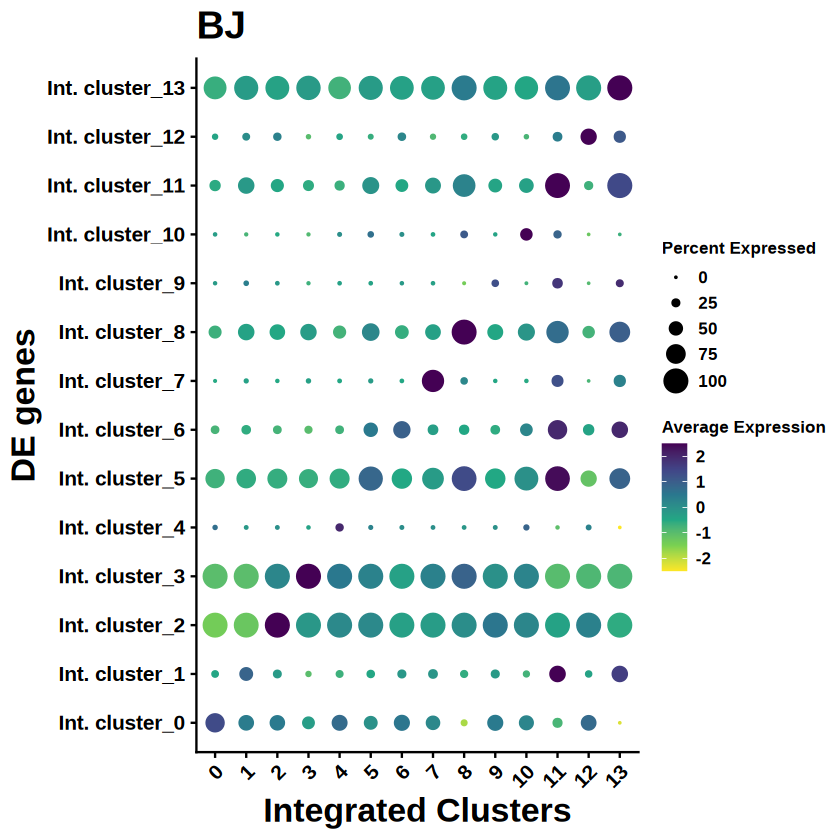

In [14]:
n1_subset_cols <- colnames(n1_subset@meta.data)
n1_subset_cols[grep("Cluster[0-9]+$", n1_subset_cols)] <- paste("Int. cluster", sep = "_", 0:13)
colnames(n1_subset@meta.data) <- n1_subset_cols
markers_mod <- paste("Int. cluster", sep = "_", 0:13)

p <- DotPlot(n1_subset , features = , markers_mod , assay = "SCT",
        cluster.idents = F, group.by = "cca_cluster")  + RotatedAxis() + 
        scale_color_viridis_c(direction = -1) + coord_flip()
p <- p + theme(text = element_text(size = 20, face = "bold")) +
    ylab("Integrated Clusters") +
   xlab("DE genes") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme(
        legend.title = element_text(size = 10),
        legend.text = element_text(size = 10)
    )+ggtitle("BJ")
p$data$id <- factor(p$data$id, levels = 0:99)

p
ggsave(plot = p, "BJ_nebula_module_dotplot_marker.pdf", height = 5, width = 7, bg = "white")

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


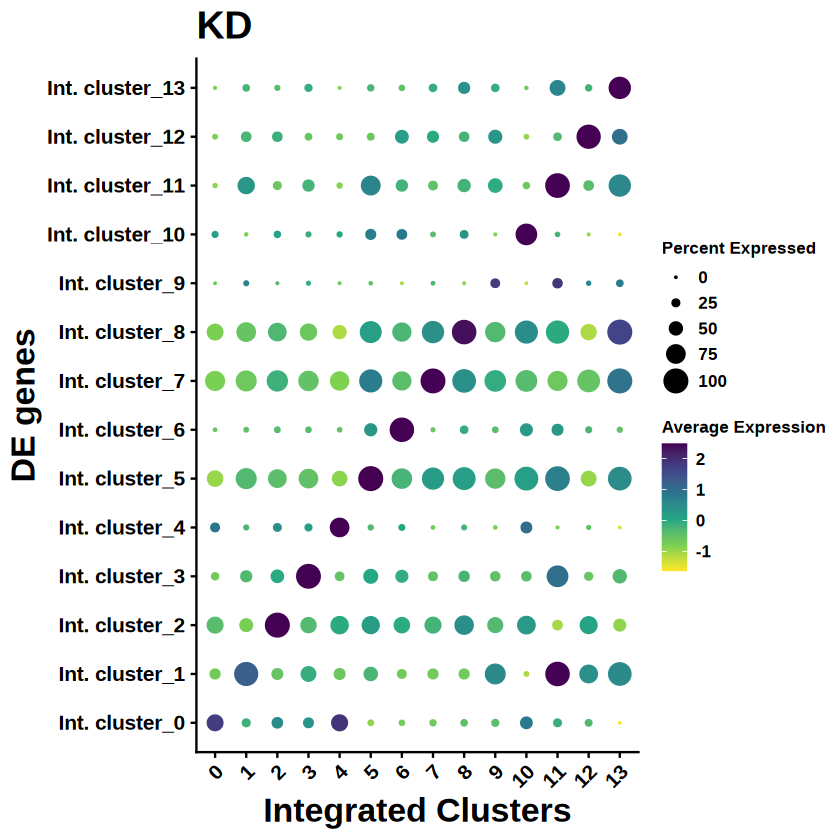

In [15]:
n2_subset_cols <- colnames(n2_subset@meta.data)
n2_subset_cols[grep("Cluster[0-9]+$", n2_subset_cols)] <- paste("Int. cluster", sep = "_", 0:13)
colnames(n2_subset@meta.data) <- n2_subset_cols
markers_mod <- paste("Int. cluster", sep = "_", 0:13)

p <- DotPlot(n2_subset , features = , markers_mod , assay = "SCT",
        cluster.idents = F, group.by = "cca_cluster")  + RotatedAxis() + 
        scale_color_viridis_c(direction = -1) + coord_flip()
p <- p + theme(text = element_text(size = 20, face = "bold")) +
    ylab("Integrated Clusters") +
    xlab("DE genes") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme(
        legend.title = element_text(size = 10),
        legend.text = element_text(size = 10)
     )+ggtitle("KD")
p$data$id <- factor(p$data$id, levels = 0:99)

p
ggsave(plot = p, "KD_nebula_module_dotplot_marker.pdf", height = 5, width = 7, bg = "white")

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


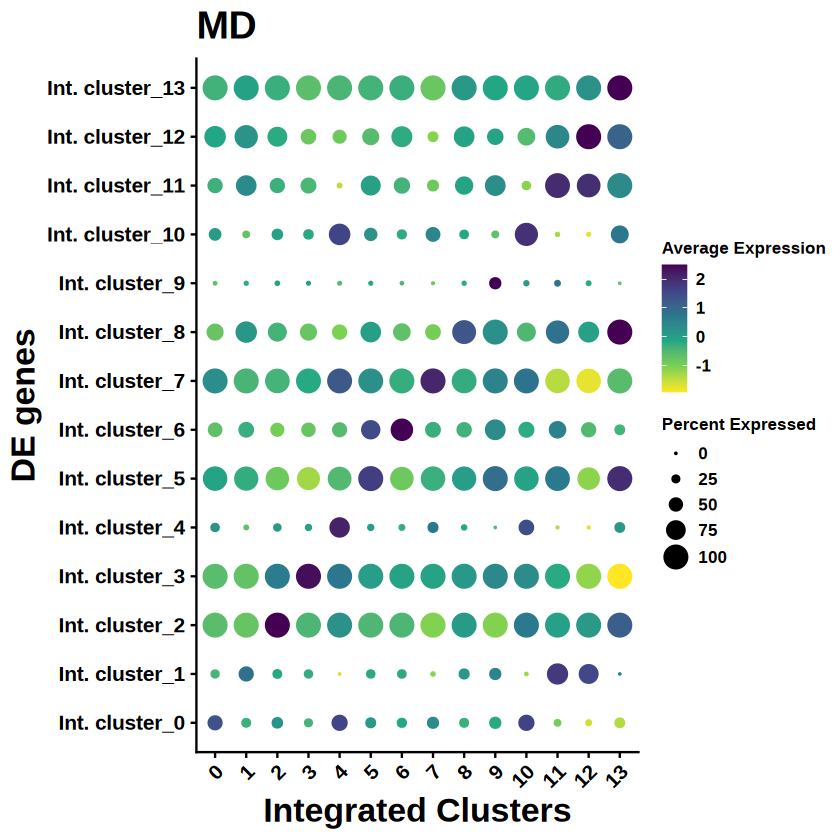

In [16]:
n3_subset_cols <- colnames(n3_subset@meta.data)
n3_subset_cols[grep("Cluster[0-9]+$", n3_subset_cols)] <- paste("Int. cluster", sep = "_", 0:13)
colnames(n3_subset@meta.data) <- n3_subset_cols
markers_mod <- paste("Int. cluster", sep = "_", 0:13)

p <- DotPlot(n3_subset , features = , markers_mod , assay = "SCT",
        cluster.idents = F, group.by = "cca_cluster")  + RotatedAxis() + 
        scale_color_viridis_c(direction = -1) + coord_flip()
p <- p + theme(text = element_text(size = 20, face = "bold")) +
    ylab("Integrated Clusters") +
   xlab("DE genes") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme(
        legend.title = element_text(size = 10),
        legend.text = element_text(size = 10)
    )+ggtitle("MD")
p$data$id <- factor(p$data$id, levels = 0:99)

p
ggsave(plot = p, "MD_nebula_module_dotplot_marker.pdf", height = 5, width = 7, bg = "white")

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


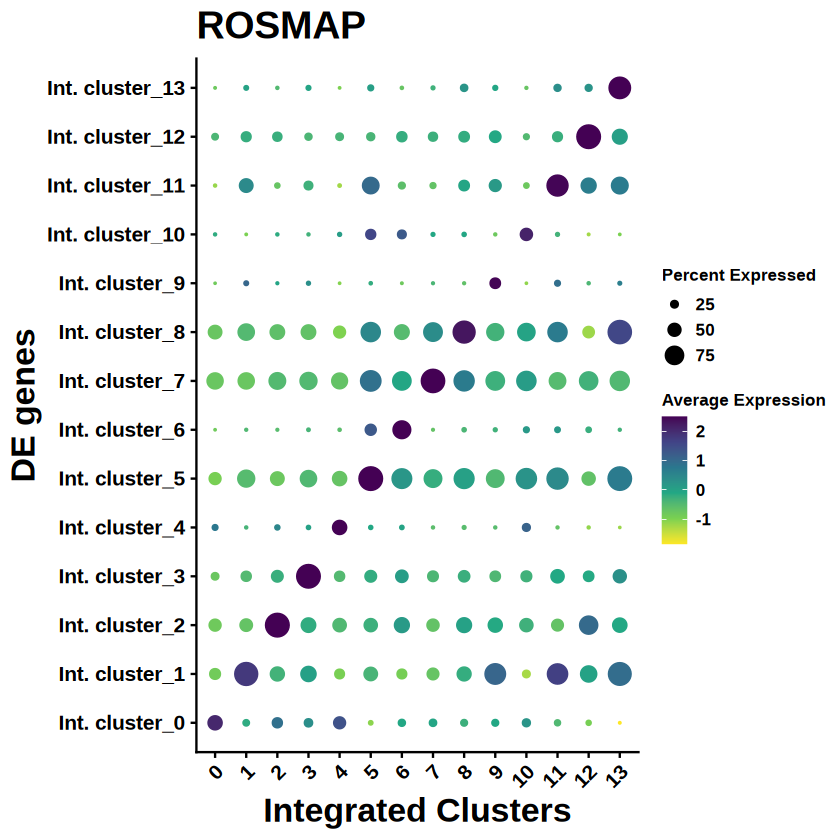

In [17]:
n4_subset_cols <- colnames(n4_subset@meta.data)
n4_subset_cols[grep("Cluster[0-9]+$", n4_subset_cols)] <- paste("Int. cluster", sep = "_", 0:13)
colnames(n4_subset@meta.data) <- n4_subset_cols
markers_mod <- paste("Int. cluster", sep = "_", 0:13)

p <- DotPlot(n4_subset , features = , markers_mod , assay = "SCT",
        cluster.idents = F, group.by = "cca_cluster")  + RotatedAxis() + 
        scale_color_viridis_c(direction = -1) + coord_flip()
p <- p + theme(text = element_text(size = 20, face = "bold")) +
    ylab("Integrated Clusters") +
    xlab("DE genes") +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    theme(
        legend.title = element_text(size = 10),
        legend.text = element_text(size = 10)
    )+ggtitle("ROSMAP")
p$data$id <- factor(p$data$id, levels = 0:99)

p
ggsave(plot = p, "ROSMAP_nebula_module_dotplot_marker.pdf", height = 5, width = 7, bg = "white")

Chcek if this needed to plot

In [2]:
# plot the partial residuals
# library(dplyr)
# library(tidyr)
# library(ggplot2)
# library(ggpubr)
# library(Seurat)
# library(RColorBrewer)
# myColors = c(brewer.pal(9, 'Set1'))
# myColors[6] = '#EBEB00'

# activated = c('ABCA1','RELB','GPNMB','CD68','C5AR1','TNFAIP3','CD83')
# resting = c('TMEM119','P2RY13','CX3CR1','BIN1','MED12L','SELPLG')
# genes = c(activated,resting)

# corrected = readRDS('/home/brasel/SingleCellProjects/MyProjects/67BrainsPaper/microglia_resting_activated_genes_partialResidual.rds')
# corrected = corrected[,c('clusterSet',genes)]
# df = aggregate(corrected,by=list(corrected$clusterSet),FUN='mean')
# df = gather(df,'Gene','Expression',3:dim(df)[2])
# df$Cluster = df$Group.1
# df$Expression = df$Expression - (min(df$Expression)-0.1)
# #write.table(df[,-c(1,2)], '/home/brasel/SingleCellProjects/MyProjects/67BrainsPaper/createSourceFiles_NatComm/SupFig8.csv', sep = ', ', quote = F, row.names = F, col.names = T) # nolint: line_length_linter.

# p = ggplot(df[df$Gene %in% activated,],aes(x=factor(Gene,levels=rev(unique(Gene))), y=Expression, fill=factor(as.character(Cluster),levels=c(0:8)) ))+#, color=factor(as.character(Cluster)), alpha=factor(as.character(Cluster)))) +
# geom_bar(width=0.7,stat="identity", position =position_dodge())+#"identity") +
#  #scale_colour_manual(values=rev(myColors[1:3])) + #values=c('green','red','blue')) + #
#  scale_fill_manual(values=rev(myColors[9:1]),guide=guide_legend(reverse=F)) + theme_minimal() +#values=c('green','red','blue')) + #
#  theme(axis.title.x=element_blank(), axis.text.y=element_text(size=14,color='black'),axis.text.x=element_text(size=14,color='black') ) +
# labs(fill='Cluster') 
# p2 = ggplot(df[df$Gene %in% resting,],aes(x=factor(Gene,levels=rev(unique(Gene))), y=Expression, fill=factor(as.character(Cluster),levels=c(0:8)) ))+#, color=factor(as.character(Cluster)), alpha=factor(as.character(Cluster)))) +
# geom_bar(width=0.7,stat="identity", position =position_dodge())+#"identity") +
#  ##scale_colour_manual(values=rev(myColors[1:3])) + #values=c('green','red','blue')) + #
#  scale_fill_manual(values=rev(myColors[9:1]),guide=guide_legend(reverse=F)) + theme_minimal() +#values=c('green','red','blue')) + #
#  theme(axis.title.x=element_blank(), axis.text.y=element_text(size=14,color='black'),axis.text.x=element_text(size=14,color='black') ) +
# labs(fill='Cluster')
# q = ggarrange(p2,p, labels = c("a", "b"), ncol = 1, nrow = 2, common.legend=T,legend="right")

Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”
Warning message in mean.default(X[[i]], ...):
“argument is not numeric or logical: returning NA”


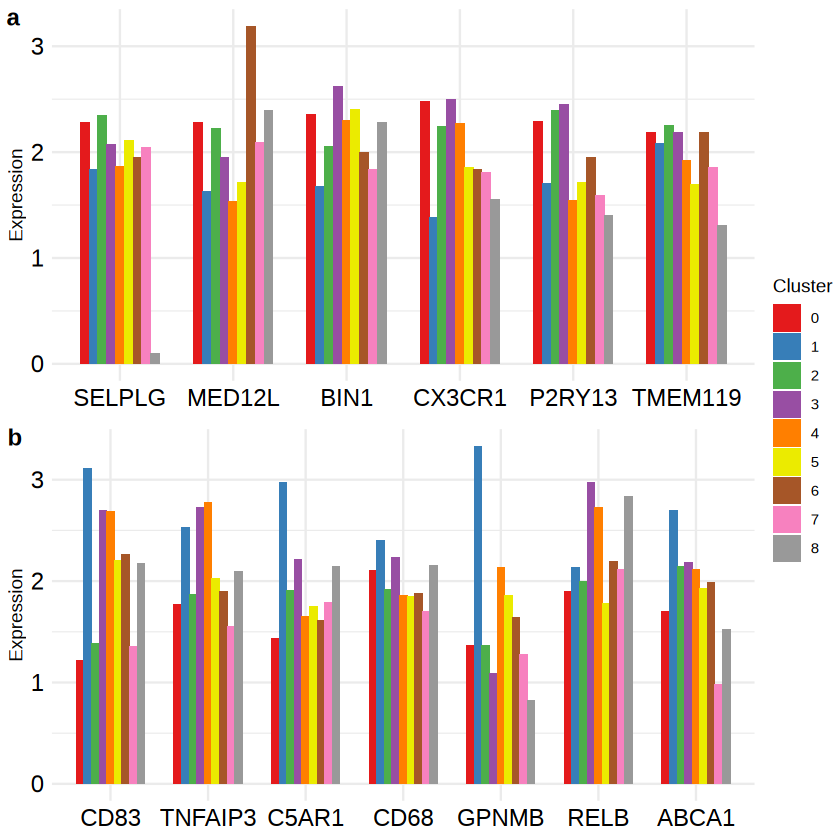

In [5]:
#q